In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
data=pd.read_excel("dataset.xlsx")
data

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0           0.237   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0           0.694   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1         -0.022     -0.517                  0.011  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643       0.542     -0.907                 -0.326  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import lifelines
import shap

In [ ]:
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [ ]:
def miss_data(x):
    total = x.isnull().sum()
    percent = (x.isnull().sum()/x.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(x[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
for x in data.columns:
    if data[x].dtype=='float16' or  data[x].dtype=='float32' or  data[x].dtype=='float64':
        data[x].fillna(data[x].mean())

data = data.fillna(data.median())

for y in data.columns:
    if data[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data[y].values))
        data[y] = lbl.transform(list(data[y].values))

In [ ]:
threshold = 0.92

corr_matrix = data.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()



patient_id  \
patient_id                                                 NaN   
patient_age_quantile                                       NaN   
sars-cov-2_exam_result                                     NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)             NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...         NaN   

                                                    patient_age_quantile  \
patient_id                                                         0.014   
patient_age_quantile                                                 NaN   
sars-cov-2_exam_result                                               NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)                       NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                   NaN   

                                                    sars-cov-2_exam_result  \
patient_id                                                           0.019   
patient_age_quantile                                                 0.075   
sars-cov-2_exam_result                                                 NaN   
patient_addmited_to_regular_ward_(1=yes,_0=no)                         NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                     NaN   

                                                    patient_addmited_to_regular_ward_(1=yes,_0=no)  \
patient_id                                                                                   0.004   
patient_age_quantile                                                                         0.046   
sars-cov-2_exam_result                                                                       0.142   
patient_addmited_to_regular_ward_(1=yes,_0=no)                                                 NaN   
patient_addmited_to_semi-intensive_unit_(1=yes,...                                             NaN   

                                                    patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
patient_id                                                                                      0.005       
patient_age_quantile                                                                            0.016       
sars-cov-2_exam_result                                                                          0.019       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                                  0.011       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                                NaN       

                                                    patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
patient_id                                                                                      0.000       
patient_age_quantile                                                                            0.036       
sars-cov-2_exam_result                                                                          0.028       
patient_addmited_to_regular_ward_(1=yes,_0=no)                                                  0.010       
patient_addmited_to_semi-intensive_unit_(1=yes,...                                              0.008       

                                                    hematocrit  hemoglobin  \
patient_id                                               0.020       0.015   
patient_age_quantile                                     0.026       0.015   
sars-cov-2_exam_result                                   0.035       0.038   
patient_addmited_to_regular_ward_(1=yes,_0=no)           0.084       0.085   
patient_addmited_to_semi-intensive_unit_(1=yes,...       0.173       0.166   

                                                    platelets  \
patient_id                                              0.007   
patient_age_quantile                                    0.038   
sars-cov-2_exam_result                                  0.101   
patient_addmited_to_regular_ward_(1=yes,_0=no)          0.122   
patient_addm

In [ ]:


to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = data.drop(columns = to_drop)


data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing.head()



There are 23 columns to remove.


urine_-_sugar                       1.000
mycoplasma_pneumoniae               1.000
partial_thromboplastin_time (ptt)   1.000
d-dimer                             1.000
prothrombin_time_(pt),_activity     1.000
dtype: float64

In [ ]:


data_missing_ = data_missing.index[data_missing > 0.85]
all_missing = list(set(data_missing_))


dataset = dataset.drop(columns = all_missing)



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 83 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   patient_id                                             5644 non-null   int64  
 1   patient_age_quantile                                   5644 non-null   int64  
 2   sars-cov-2_exam_result                                 5644 non-null   int64  
 3   patient_addmited_to_regular_ward_(1=yes,_0=no)         5644 non-null   int64  
 4   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  5644 non-null   int64  
 5   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  5644 non-null   int64  
 6   hematocrit                                             5644 non-null   float64
 7   platelets                                              5644 non-null   float64
 8   mean_platelet_volume                            

In [ ]:
cols = [x for x in dataset.columns if x not in ['patient_id','sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']]
new_df = dataset[cols]
new_df

patient_age_quantile  hematocrit  platelets  mean_platelet_volume  \
0                       13       0.053     -0.122                -0.102   
1                       17       0.237     -0.517                 0.011   
2                        8       0.053     -0.122                -0.102   
3                        5       0.053     -0.122                -0.102   
4                       15       0.053     -0.122                -0.102   
...                    ...         ...        ...                   ...   
5639                     3       0.053     -0.122                -0.102   
5640                    17       0.053     -0.122                -0.102   
5641                     4       0.053     -0.122                -0.102   
5642                    10       0.053     -0.122                -0.102   
5643                    19       0.694     -0.907                -0.326   

      red_blood_cells  lymphocytes  \
0               0.014       -0.014   
1               0.102        0.318   
2               0.014       -0.014   
3               0.014       -0.014   
4               0.014       -0.014   
...               ...          ...   
5639            0.014       -0.014   
5640            0.014       -0.014   
5641            0.014       -0.014   
5642            0.014       -0.014   
5643            0.578       -0.296   

      mean_corpuscular_hemoglobin_concentration (mchc)  leukocytes  basophils  \
0                                               -0.055      -0.213     -0.224   
1                                               -0.951      -0.095     -0.224   
2                                               -0.055      -0.213     -0.224   
3                                               -0.055      -0.213     -0.224   
4                                               -0.055      -0.213     -0.224   
...                                                ...         ...        ...   
5639                                            -0.055      -0.213     -0.224   
5640                                            -0.055      -0.213     -0.224   
5641                                            -0.055      -0.213     -0.224   
5642                                            -0.055      -0.213     -0.224   
5643                                            -0.353      -1.288     -1.140   

      mean_corpuscular_hemoglobin_(mch)  ...  lipase_dosage  albumin  \
0                                 0.126  ...         -0.351   -0.038   
1                                -0.292  ...         -0.351   -0.038   
2                                 0.126  ...         -0.351   -0.038   
3                                 0.126  ...         -0.351   -0.038   
4                                 0.126  ...         -0.351   -0.038   
...                                 ...  ...            ...      ...   
5639                              0.126  ...         -0.351   -0.038   
5640                              0.126  ...         -0.351   -0.038   
5641                              0.126  ...         -0.351   -0.038   
5642                              0.126  ...         -0.351   -0.038   
5643                             -0.135  ...         -0.351   -0.038   

      hb_saturation_(arterial_blood_gases)  \
0                                    0.268   
1                                    0.268   
2                                    0.268   
3                                    0.268   
4                                    0.268   
...                                    ...   
5639                                 0.268   
5640                                 0.268   
5641                                 0.268   
5642                                 0.268   
5643                                 0.268   

      pco2_(arterial_blood_gas_analysis)  \
0                                 -0.212   
1                                 -0.212   
2                                 -0.212   
3                                 -0.212   
4                                 -0.

In [ ]:
X = new_df
y = dataset['sars-cov-2_exam_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

In [ ]:
import numpy as np
np.set_printoptions(formatter={'float':lambda x:"{:.4f}".format(x)})
import pandas as pd
pd.options.display.float_format = "{:.3f}".format
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='talk', palette='rainbow')
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier)
import shap 
shap.initjs()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}\n")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")
display(X_train.head())
# Train a simple model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

Training features shape: (4515, 78)
Training target shape: (4515,)

Test features shape: (1129, 78)
Test target shape: (1129,)


patient_age_quantile  hematocrit  platelets  mean_platelet_volume  \
2045                     9      -0.633      0.199                 0.347   
2719                     3       0.053     -0.122                -0.102   
1749                    14       0.053     -0.122                -0.102   
3108                    14       0.053     -0.122                -0.102   
322                      3       0.053     -0.122                -0.102   

      red_blood_cells  lymphocytes  \
2045           -1.009       -0.236   
2719            0.014       -0.014   
1749            0.014       -0.014   
3108            0.014       -0.014   
322             0.014       -0.014   

      mean_corpuscular_hemoglobin_concentration (mchc)  leukocytes  basophils  \
2045                                            -0.254       0.473     -0.835   
2719                                            -0.055      -0.213     -0.224   
1749                                            -0.055      -0.213     -0.224   
3108                                            -0.055      -0.213     -0.224   
322                                             -0.055      -0.213     -0.224   

      mean_corpuscular_hemoglobin_(mch)  ...  lipase_dosage  albumin  \
2045                              0.805  ...         -0.351   -0.038   
2719                              0.126  ...         -0.351   -0.038   
1749                              0.126  ...         -0.351   -0.038   
3108                              0.126  ...         -0.351   -0.038   
322                               0.126  ...         -0.351   -0.038   

      hb_saturation_(arterial_blood_gases)  \
2045                                 0.268   
2719                                 0.268   
1749                                 0.268   
3108                                 0.268   
322                                  0.268   

      pco2_(arterial_blood_gas_analysis)  \
2045                              -0.212   
2719                              -0.212   
1749                              -0.212   
3108                              -0.212   
322                               -0.212   

      base_excess_(arterial_blood_gas_analysis)  \
2045                                     -0.012   
2719                                     -0.012   
1749                                     -0.012   
3108                                     -0.012   
322                                      -0.012   

      total_co2_(arterial_blood_gas_analysis)  \
2045                                    0.077   
2719                                    0.077   
1749                                    0.077   
3108                                    0.077   
322                                     0.077   

      po2_(arterial_blood_gas_analysis)  arteiral_fio2  phosphor  \
2045                             -0.160         -0.012    -0.138   
2719                             -0.160         -0.012    -0.138   
1749                             -0.160         -0.012    -0.138   
3108                             -0.160         -0.012    -0.138   
322                              -0.160         -0.012    -0.138   

      cto2_(arterial_blood_gas_analysis)  
2045                               0.183  
2719                               0.183  
1749                               0.183  
3108                               0.183  
322                                0.183  

[5 rows x 78 columns]

RandomForestRegressor(random_state=42)

In [ ]:
explainer = shap.Explainer(model)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 1129

Sample shap value:
.values =
array([-0.0416, 0.0001, 0.0011, 0.0000, 0.0003, -0.0001, 0.0001, -0.0057,
       0.0001, 0.0002, -0.0002, 0.0002, -0.0005, -0.0002, -0.0001, 0.0008,
       0.0010, 0.0003, 0.0015, 0.0036, -0.0001, -0.0000, 0.0000, -0.0003,
       0.0003, -0.0000, 0.0000, -0.0021, -0.0001, -0.0001, -0.0003,
       -0.0000, -0.0001, 0.0000, -0.0000, -0.0000, -0.0544, 0.0000,
       -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000,
       0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -0.0002,
       -0.0000, 0.0000, 0.0000, -0.0003, -0.0001, -0.0001, 0.0001,
       -0.0001, -0.0000, -0.0003, 0.0000, -0.0000, 0.0000, -0.0005,
       -0.0000, 0.0000, -0.0000, -0.0000, -0.0000, -0.0003, -0.0002,
       0.0000, 0.0000, -0.0003])

.base_values =
array([0.1001])

.data =
array([12.0000, 0.0534, -0.1217, -0.1015, 0.0139, -0.0143, -0.0546,
       -0.2129, -0.2238, 0.1259, -0.3298, 0.0660, -0.1152, -0.1828,
       -0.2921, 1.0000, 1.0

In [ ]:
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")

Expected value: 0.1
Average target value (training data): 0.1
Base value: 0.1


In [ ]:
(shap_test.data == X_test).describe()

patient_age_quantile hematocrit platelets mean_platelet_volume  \
count                  1129       1129      1129                 1129   
unique                    1          1         1                    1   
top                    True       True      True                 True   
freq                   1129       1129      1129                 1129   

       red_blood_cells lymphocytes  \
count             1129        1129   
unique               1           1   
top               True        True   
freq              1129        1129   

       mean_corpuscular_hemoglobin_concentration (mchc) leukocytes basophils  \
count                                              1129       1129      1129   
unique                                                1          1         1   
top                                                True       True      True   
freq                                               1129       1129      1129   

       mean_corpuscular_hemoglobin_(mch)  ... lipase_dosage albumin  \
count                               1129  ...          1129    1129   
unique                                 1  ...             1       1   
top                                 True  ...          True    True   
freq                                1129  ...          1129    1129   

       hb_saturation_(arterial_blood_gases)  \
count                                  1129   
unique                                    1   
top                                    True   
freq                                   1129   

       pco2_(arterial_blood_gas_analysis)  \
count                                1129   
unique                                  1   
top                                  True   
freq                                 1129   

       base_excess_(arterial_blood_gas_analysis)  \
count                                       1129   
unique                                         1   
top                                         True   
freq                                        1129   

       total_co2_(arterial_blood_gas_analysis)  \
count                                     1129   
unique                                       1   
top                                       True   
freq                                      1129   

       po2_(arterial_blood_gas_analysis) arteiral_fio2 phosphor  \
count                               1129          1129     1129   
unique                                 1             1        1   
top                                 True          True     True   
freq                                1129          1129     1129   

       cto2_(arterial_blood_gas_analysis)  
count                                1129  
unique                                  1  
top                                  True  
freq                                 1129  

[4 rows x 78 columns]

In [ ]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names, 
             index=X_test.index)

patient_age_quantile  hematocrit  platelets  mean_platelet_volume  \
4441                12.000       0.053     -0.122                -0.102   
1603                 1.000       0.053     -0.122                -0.102   
1206                10.000       0.053     -0.122                -0.102   
1586                 6.000       0.053     -0.122                -0.102   
2730                16.000       0.053     -0.122                -0.102   
...                    ...         ...        ...                   ...   
5561                11.000       0.053     -0.122                -0.102   
37                  10.000       0.053     -0.122                -0.102   
1497                13.000       0.053     -0.122                -0.102   
4125                10.000       0.053     -0.122                -0.102   
5031                 6.000       0.053     -0.122                -0.102   

      red_blood_cells  lymphocytes  \
4441            0.014       -0.014   
1603            0.014       -0.014   
1206            0.014       -0.014   
1586            0.014       -0.014   
2730            0.014       -0.014   
...               ...          ...   
5561            0.014       -0.014   
37              0.014       -0.014   
1497            0.014       -0.014   
4125            0.014       -0.014   
5031            0.014       -0.014   

      mean_corpuscular_hemoglobin_concentration (mchc)  leukocytes  basophils  \
4441                                            -0.055      -0.213     -0.224   
1603                                            -0.055      -0.213     -0.224   
1206                                            -0.055      -0.213     -0.224   
1586                                            -0.055      -0.213     -0.224   
2730                                            -0.055      -0.213     -0.224   
...                                                ...         ...        ...   
5561                                            -0.055      -0.213     -0.224   
37                                              -0.055      -0.213     -0.224   
1497                                            -0.055      -0.213     -0.224   
4125                                            -0.055      -0.213     -0.224   
5031                                            -0.055      -0.213     -0.224   

      mean_corpuscular_hemoglobin_(mch)  ...  lipase_dosage  albumin  \
4441                              0.126  ...         -0.351   -0.038   
1603                              0.126  ...         -0.351   -0.038   
1206                              0.126  ...         -0.351   -0.038   
1586                              0.126  ...         -0.351   -0.038   
2730                              0.126  ...         -0.351   -0.038   
...                                 ...  ...            ...      ...   
5561                              0.126  ...         -0.351   -0.038   
37                                0.126  ...         -0.351   -0.038   
1497                              0.126  ...         -0.351   -0.038   
4125                              0.126  ...         -0.351   -0.038   
5031                              0.126  ...         -0.351   -0.038   

      hb_saturation_(arterial_blood_gases)  \
4441                                 0.268   
1603                                 0.268   
1206                                 0.268   
1586                                 0.268   
2730                                 0.268   
...                                    ...   
5561                                 0.268   
37                                   0.268   
1497                                 0.268   
4125                                 0.268   
5031                                 0.268   

      pco2_(arterial_blood_gas_analysis)  \
4441                              -0.212   
1603                              -0.212   
1206                              -0.212   
1586                              -0.212   
2730                              -0.

In [ ]:
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

patient_age_quantile  hematocrit  platelets  mean_platelet_volume  \
4441                -0.042       0.000      0.001                 0.000   
1603                -0.090       0.000      0.001                -0.000   
1206                 0.023       0.000      0.003                 0.000   
1586                 0.034       0.000      0.003                 0.000   
2730                 0.020       0.000      0.003                 0.000   
...                    ...         ...        ...                   ...   
5561                 0.009       0.000      0.002                 0.000   
37                   0.023       0.000      0.003                 0.000   
1497                 0.007       0.000      0.002                 0.000   
4125                 0.023       0.000      0.003                 0.000   
5031                 0.034       0.000      0.003                 0.000   

      red_blood_cells  lymphocytes  \
4441            0.000       -0.000   
1603            0.000       -0.000   
1206            0.000       -0.000   
1586            0.000       -0.000   
2730            0.000       -0.000   
...               ...          ...   
5561            0.000       -0.000   
37              0.000       -0.000   
1497            0.000       -0.000   
4125            0.000       -0.000   
5031            0.000       -0.000   

      mean_corpuscular_hemoglobin_concentration (mchc)  leukocytes  basophils  \
4441                                             0.000      -0.006      0.000   
1603                                             0.000      -0.004     -0.000   
1206                                             0.000      -0.004      0.000   
1586                                             0.000      -0.003      0.000   
2730                                             0.000      -0.004      0.000   
...                                                ...         ...        ...   
5561                                             0.000      -0.005      0.000   
37                                               0.000      -0.004      0.000   
1497                                             0.000      -0.005      0.000   
4125                                             0.000      -0.004      0.000   
5031                                             0.000      -0.003      0.000   

      mean_corpuscular_hemoglobin_(mch)  ...  lipase_dosage  albumin  \
4441                              0.000  ...         -0.000    0.000   
1603                              0.000  ...         -0.000    0.000   
1206                              0.000  ...         -0.000    0.000   
1586                              0.000  ...         -0.000    0.000   
2730                              0.000  ...         -0.000    0.000   
...                                 ...  ...            ...      ...   
5561                              0.000  ...         -0.000    0.000   
37                                0.000  ...         -0.000    0.000   
1497                              0.000  ...         -0.000    0.000   
4125                              0.000  ...         -0.000    0.000   
5031                              0.000  ...         -0.000    0.000   

      hb_saturation_(arterial_blood_gases)  \
4441                                -0.000   
1603                                -0.000   
1206                                -0.000   
1586                                -0.000   
2730                                -0.000   
...                                    ...   
5561                                -0.000   
37                                  -0.000   
1497                                -0.000   
4125                                -0.000   
5031                                -0.000   

      pco2_(arterial_blood_gas_analysis)  \
4441                              -0.000   
1603                              -0.000   
1206                              -0.000   
1586                              -0.000   
2730                              -0.

In [ ]:
np.isclose(model.predict(X_test), 
           explainer.expected_value[0] + shap_df.sum(axis=1))

array([ True,  True,  True, ...,  True,  True,  True])

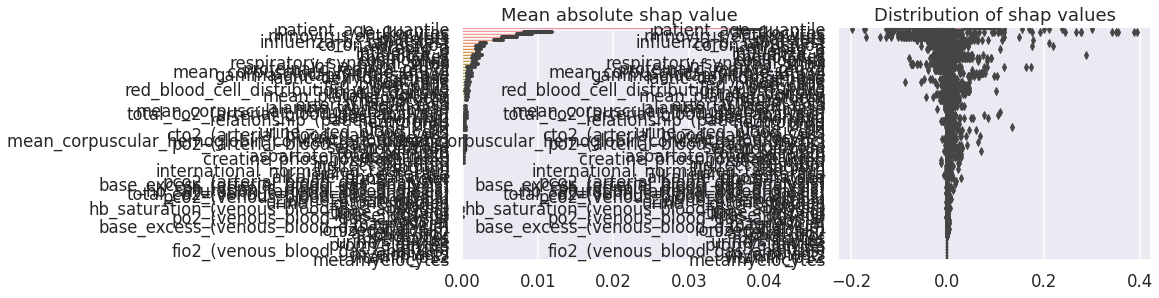

In [ ]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

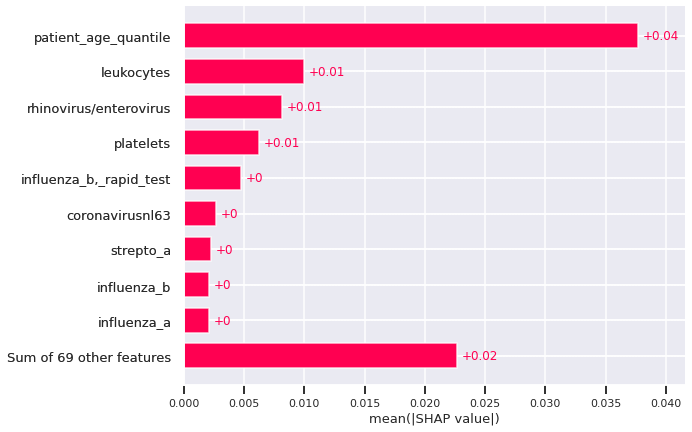

In [ ]:
shap.plots.bar(shap_test)

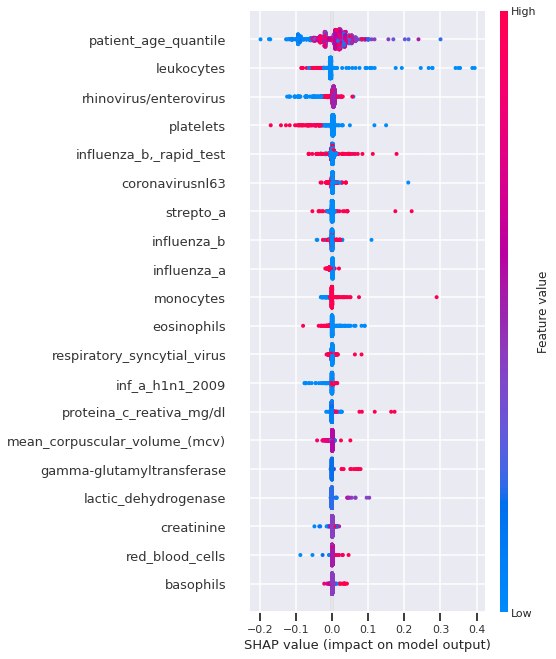

In [ ]:
shap.summary_plot(shap_test)

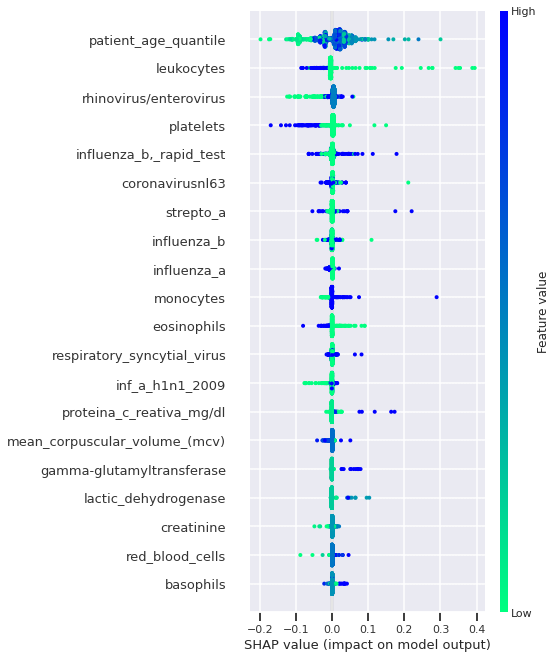

In [ ]:
shap.summary_plot(shap_test, cmap=plt.get_cmap("winter_r"))

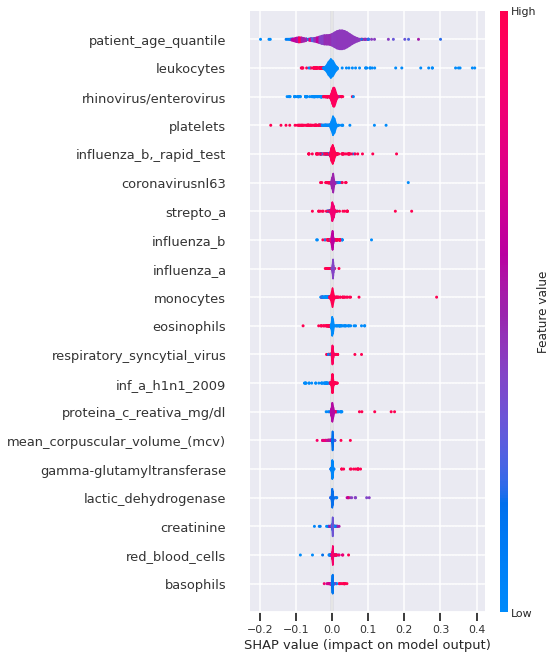

In [ ]:
shap.summary_plot(shap_test, plot_type='violin')

In [ ]:
shap.plots.heatmap(shap_test)

In [ ]:
shap.plots.heatmap(shap_test, cmap=plt.get_cmap("winter_r"))

In [ ]:
shap.force_plot(explainer.expected_value, shap_test.values, 
                X_test)

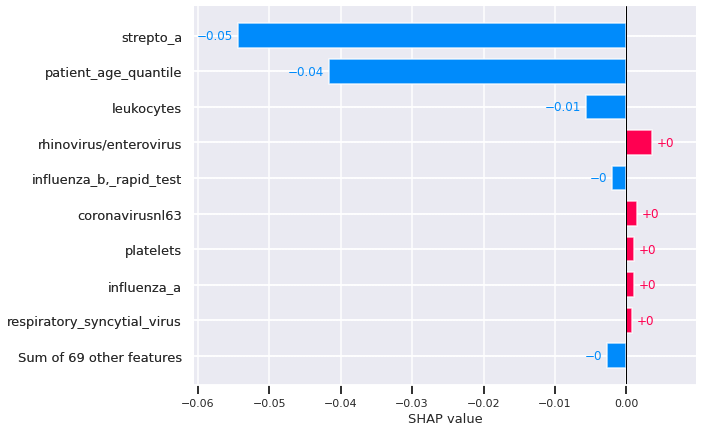

In [ ]:
shap.plots.bar(shap_test[0])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9061116031886626

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.8911, 0.9035, 0.9035, 0.9043, 0.8848])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.01


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
  print('train -  {}   |   test -  {}'.format(
np.bincount(y[train]), np.bincount(y[test])))

train -  [3390  372]   |   test -  [1696  186]
train -  [3391  372]   |   test -  [1695  186]
train -  [3391  372]   |   test -  [1695  186]


In [ ]:
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
  print('train -  {}   |   test -  {}'.format(
np.bincount(y[train]), np.bincount(y[test])))

train -  [3286  476]   |   test -  [1800   82]
train -  [3310  453]   |   test -  [1776  105]
train -  [3576  187]   |   test -  [1510  371]


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.72017560
Iteration 2, loss = 0.32986723
Iteration 3, loss = 0.32347632
Iteration 4, loss = 0.31982623
Iteration 5, loss = 0.31934651
Iteration 6, loss = 0.31862948
Iteration 7, loss = 0.31970035
Iteration 8, loss = 0.31870144
Iteration 9, loss = 0.31871909
Iteration 10, loss = 0.31846574
Iteration 11, loss = 0.31760436
Iteration 12, loss = 0.31765687
Iteration 13, loss = 0.31764926
Iteration 14, loss = 0.31732084
Iteration 15, loss = 0.31746604
Iteration 16, loss = 0.31674008
Iteration 17, loss = 0.31631189
Iteration 18, loss = 0.31596936
Iteration 19, loss = 0.31596540
Iteration 20, loss = 0.31556812
Iteration 21, loss = 0.31515910
Iteration 22, loss = 0.31528453
Iteration 23, loss = 0.31509171
Iteration 24, loss = 0.31509438
Iteration 25, loss = 0.31505609
Iteration 26, loss = 0.31474643
Iteration 27, loss = 0.31478544
Iteration 28, loss = 0.31462330
Iteration 29, loss = 0.31410591
Iteration 30, loss = 0.31402719
Iteration 31, loss = 0.31438556
Iteration 32, los

In [ ]:
accuracy_score(y_test, y_pred)

0.9052258635961028

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Admission to ward model
Based on the traning data, we predict whether patient needs to be admitted to general ward(1), semi-ICU(2) or ICU(3) or no admission is needed(0)¶

In [ ]:
covid_positive = dataset[dataset['sars-cov-2_exam_result'] == 1]

admission = []  

def multiclass_target(row):
    check = 0
    check += 1 if (row['patient_addmited_to_regular_ward_(1=yes,_0=no)'] == 1) else 0
    check += 2 if (row['patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)'] == 1) else 0
    check += 2 if (row['patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'] == 1) else 0
    row['target'] = check
    return row

data_adm = covid_positive.apply(multiclass_target, axis=1)
data_adm.rename(columns = {'mean_corpuscular_hemoglobin_concentration': 'mchc','mean_corpuscular_hemoglobin_(mch)' : 'mch'},inplace= True)
data_adm

patient_id  patient_age_quantile  sars-cov-2_exam_result  \
67      2704.000                 7.000                   1.000   
284     4796.000                16.000                   1.000   
513     3969.000                10.000                   1.000   
568     1569.000                 2.000                   1.000   
676     4718.000                15.000                   1.000   
...          ...                   ...                     ...   
5632    2117.000                16.000                   1.000   
5633    3568.000                 4.000                   1.000   
5634    4877.000                15.000                   1.000   
5639    3892.000                 3.000                   1.000   
5643     918.000                19.000                   1.000   

      patient_addmited_to_regular_ward_(1=yes,_0=no)  \
67                                             0.000   
284                                            1.000   
513                                            0.000   
568                                            0.000   
676                                            0.000   
...                                              ...   
5632                                           0.000   
5633                                           0.000   
5634                                           0.000   
5639                                           0.000   
5643                                           0.000   

      patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
67                                                0.000       
284                                               0.000       
513                                               0.000       
568                                               0.000       
676                                               0.000       
...                                                 ...       
5632                                              0.000       
5633                                              0.000       
5634                                              0.000       
5639                                              0.000       
5643                                              0.000       

      patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  hematocrit  \
67                                                0.000           0.053   
284                                               0.000           0.053   
513                                               0.000           0.053   
568                                               0.000           0.992   
676                                               0.000           0.053   
...                                                 ...             ...   
5632                                              0.000           0.053   
5633                                              0.000           0.053   
5634                                              0.000           0.053   
5639                                              0.000           0.053   
5643                                              0.000           0.694   

      platelets  mean_platelet_volume  red_blood_cells  ...  albumin  \
67       -0.122                -0.102            0.014  ...   -0.038   
284      -0.122                -0.102            0.014  ...   -0.038   
513      -0.122                -0.102            0.014  ...   -0.038   
568      -0.342                 1.469            1.653  ...   -0.038   
676      -0.122                -0.102            0.014  ...   -0.038   
...         ...                   ...              ...  ...      ...   
5632     -0.122                -0.102            0.014  ...   -0.038   
5633     -0.122                -0.102            0.014  ...   -0.038   
5634     -0.122                -0.102            0.014  ...   -0.038   
5639     -0.122                -0.102            0.014  ...   -0.038   
5643     -0.907                -0.326            0.578  ...   -0.038   

      hb_saturati

In [ ]:
admit = data_adm[['patient_age_quantile','hematocrit','platelets',  'proteina_c_reativa_mg/dl', 'red_blood_cells', 'eosinophils','leukocytes', 'monocytes','influenza_b,_rapid_test'] ]
X=admit
y = data_adm['target']

admit

patient_age_quantile  hematocrit  platelets  proteina_c_reativa_mg/dl  \
67                   7.000       0.053     -0.122                    -0.394   
284                 16.000       0.053     -0.122                    -0.394   
513                 10.000       0.053     -0.122                    -0.394   
568                  2.000       0.992     -0.342                    -0.394   
676                 15.000       0.053     -0.122                    -0.394   
...                    ...         ...        ...                       ...   
5632                16.000       0.053     -0.122                    -0.394   
5633                 4.000       0.053     -0.122                    -0.394   
5634                15.000       0.053     -0.122                    -0.394   
5639                 3.000       0.053     -0.122                    -0.394   
5643                19.000       0.694     -0.907                    -0.504   

      red_blood_cells  eosinophils  leukocytes  monocytes  \
67              0.014       -0.330      -0.213     -0.115   
284             0.014       -0.330      -0.213     -0.115   
513             0.014       -0.330      -0.213     -0.115   
568             1.653       -0.498      -0.420      1.933   
676             0.014       -0.330      -0.213     -0.115   
...               ...          ...         ...        ...   
5632            0.014       -0.330      -0.213     -0.115   
5633            0.014       -0.330      -0.213     -0.115   
5634            0.014       -0.330      -0.213     -0.115   
5639            0.014       -0.330      -0.213     -0.115   
5643            0.578       -0.836      -1.288      0.568   

      influenza_b,_rapid_test  
67                      0.000  
284                     0.000  
513                     0.000  
568                     0.000  
676                     0.000  
...                       ...  
5632                    0.000  
5633                    0.000  
5634                    0.000  
5639                    0.000  
5643                    0.000  

[558 rows x 9 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.73189993
Iteration 2, loss = 0.57785017
Iteration 3, loss = 0.49798735
Iteration 4, loss = 0.48204458
Iteration 5, loss = 0.48061256
Iteration 6, loss = 0.48360225
Iteration 7, loss = 0.48151487
Iteration 8, loss = 0.47655534
Iteration 9, loss = 0.46952927
Iteration 10, loss = 0.46294035
Iteration 11, loss = 0.45710981
Iteration 12, loss = 0.45456873
Iteration 13, loss = 0.45172320
Iteration 14, loss = 0.44893830
Iteration 15, loss = 0.44632653
Iteration 16, loss = 0.44364580
Iteration 17, loss = 0.44109757
Iteration 18, loss = 0.43861449
Iteration 19, loss = 0.43604989
Iteration 20, loss = 0.43380642
Iteration 21, loss = 0.43152739
Iteration 22, loss = 0.42941487
Iteration 23, loss = 0.42709108
Iteration 24, loss = 0.42491681
Iteration 25, loss = 0.42262784
Iteration 26, loss = 0.42050157
Iteration 27, loss = 0.41815984
Iteration 28, loss = 0.41590027
Iteration 29, loss = 0.41402566
Iteration 30, loss = 0.41119748
Iteration 31, loss = 0.40873177
Iteration 32, los

In [ ]:
accuracy_score(y_test, y_pred)

0.9285714285714286

In [ ]:
final_csv_data = data_adm.to_csv('result.csv', index = False)